# IMPORT DATA

In [75]:
train_set = r"C:\Users\durga\Desktop\Sreyas\NITK\ML\Text_Summarizer_Roadmap\Week0\WEC Intel SIG Recruitment task\train.csv"
test_set = r"C:\Users\durga\Desktop\Sreyas\NITK\ML\Text_Summarizer_Roadmap\Week0\WEC Intel SIG Recruitment task\test.csv"

In [76]:
import pandas as pd
df = pd.read_csv(train_set)

In [77]:
df.head()

,team name,opponent,host,year,toss,wickets lost,fours,sixes,extras,run rate,average innings strike rate,highest score,wickets taken,given extras,result,runs scored
0,Pakistan,Netherlands,PK,2001,FALSE,8,10,44,96,6.4,175,14,4,25,TRUE,443
1,Netherlands,Netherlands,NL,1999,TRUE,10,28,48,83,1.6,8.2,65,6,45,FALSE,86
2,Afghanistan,Bangladesh,AF,2011,TRUE,1,20,21,NaN,3.3,109.8,5,3,24,FALSE,22
3,United Kingdom,Pakistan,ZA,2010,FALSE,0,21,27,65,5.5,23.5,38,9,69,FALSE,435
4,Sri Lanka,Netherlands,PK,2000,TRUE,8,18,13,97,7.1,36.2,101,6,5,FALSE,272


# CHANGE DATATYPES 

In [78]:
df.dtypes

team name                      object
opponent                       object
host                           object
year                           object
toss                           object
wickets lost                   object
fours                          object
sixes                          object
extras                         object
run rate                       object
average innings strike rate    object
highest score                  object
wickets taken                  object
given extras                   object
result                         object
runs scored                    object
dtype: object

Convert boolean datatypes to int with 0s and 1s

In [79]:
boolean_columns = ['toss','result']
for col in boolean_columns:
    df[col] = (df[col]=="TRUE").astype("int")

In [80]:
dtypes = {
    'year': 'int',
    'toss': 'int',
    'wickets lost': 'int',
    'fours': 'int',
    'sixes': 'int',
    'extras': 'int',
    'run rate ': 'float',
    'average innings strike rate': 'float',
    'highest score': 'int',
    'wickets taken': 'float',
    'given extras': 'float',
    'result': 'int',
    'runs scored': 'int'
}

In [81]:
df = df.astype(dtypes)

ValueError: invalid literal for int() with base 10: 'year': Error while type casting for column 'year'

Check the data once

In [82]:
df['year'].unique()

array(['2001', '1999', '2011', '2010', '2000', '2009', '1995', '2012',
       '2002', '2017', '1993', '1996', '1990', '2004', '2005', '2008',
       '2006', '2003', '1997', '2007', '2014', '1992', '1989', '1994',
       '1998', '1980', '1988', '1986', '1983', '1979', '1987', '1985',
       '1978', '2015', '2016', '1977', '1984', '2019', '1991', '1967',
       '1963', '2013', '1960', '1982', '1966', '1975', '1976', '1981',
       '1968', '2018', '1953', '1964', 'year', '1956', '1969', '1965',
       '1973', '1970'], dtype=object)

there is a cell named year, check where it is and remove it

In [83]:
df[df['year']=='year']

,team name,opponent,host,year,toss,wickets lost,fours,sixes,extras,run rate,average innings strike rate,highest score,wickets taken,given extras,result,runs scored
2579,team,opponent,host,year,0,wickets lost,fours,sixes,extras,run rate,average innings strike rate,highest score,wickets taken,given extras,0,runs scored


In [84]:
df.drop(2579, inplace=True) 
#inplace to ensure that changes are applied on same data frame and not on a newly created one

In [85]:
df[df['year']=='year']

,team name,opponent,host,year,toss,wickets lost,fours,sixes,extras,run rate,average innings strike rate,highest score,wickets taken,given extras,result,runs scored


In [86]:
dtypes = {
    'year': 'int',
    'toss': 'int',
    'wickets lost': 'int',
    'fours': 'int',
    'sixes': 'int',
    'extras': 'int',
    'run rate ': 'float',
    'average innings strike rate': 'float',
    'highest score': 'int',
    'wickets taken': 'float',
    'given extras': 'float',
    'result': 'int',
    'runs scored': 'int'
}

In [87]:
df = df.astype(dtypes)

ValueError: cannot convert float NaN to integer: Error while type casting for column 'wickets lost'

As we can see, cannot handle null values with int
so use float for columns with null values

In [88]:
dtypes = {
    'year': 'int',
    'toss': 'int',
    'wickets lost': 'float',
    'fours': 'float',
    'sixes': 'float',
    'extras': 'float',
    'run rate ': 'float',
    'average innings strike rate': 'float',
    'highest score': 'int',
    'wickets taken': 'float',
    'given extras': 'float',
    'result': 'int',
    'runs scored': 'int'
}

In [89]:
df = df.astype(dtypes)

In [90]:
df.dtypes

team name                       object
opponent                        object
host                            object
year                             int32
toss                             int32
wickets lost                   float64
fours                          float64
sixes                          float64
extras                         float64
run rate                       float64
average innings strike rate    float64
highest score                    int32
wickets taken                  float64
given extras                   float64
result                           int32
runs scored                      int32
dtype: object

Summary:

In [91]:
boolean_columns = ['toss','result']
for col in boolean_columns:
    df[col] = (df[col]=="TRUE").astype("int")

In [92]:
dtypes = {
    'year': 'int',
    'toss': 'int',
    'wickets lost': 'float',
    'fours': 'float',
    'sixes': 'float',
    'extras': 'float',
    'run rate ': 'float',
    'average innings strike rate': 'float',
    'highest score': 'int',
    'wickets taken': 'float',
    'given extras': 'float',
    'result': 'int',
    'runs scored': 'int'
}
df = df.astype(dtypes)

# SPLIT DATASET

In [93]:
X = df.drop("runs scored", axis=1)
y = df["runs scored"]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PREPROCESSING

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [96]:
categorical_cols = ['team name', 'opponent', 'host']
# categorical_cols = []
numeric_cols = ["year", "toss", "wickets taken", "fours", "sixes", "extras", "run rate ",
                "average innings strike rate", "highest score", "wickets taken", "given extras", "result"]

In [97]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')), #fills null values with mean
    ("scaler", StandardScaler())                 #normalize the data
])


In [98]:
categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder())                  #what it does is in the name
])

In [99]:
preprocessor = ColumnTransformer([
    ("numeric", numeric_transformer, numeric_cols),
    ("categorical", categorical_transformer, categorical_cols),
])

# MODEL

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression())
])

# TRAIN MODEL

In [102]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('linear_model', LinearRegression())])

# EVALUATE THE MODEL

In [103]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  141.98492508884877
RMSE:  144.45169964480667


Pretty good ig

# Now using SVR

In [104]:
from sklearn.svm import SVR
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", SVR())
])

In [105]:
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim', SVR())])

In [106]:
from sklearn.metrics import mean_squared_error
y_train_pred = model2.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model2.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  140.84185541600658
RMSE:  142.83363657936204


Much better

Just for fun, let us try with more modifications on similar model

In [117]:
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", SVR(gamma='scale'))
])
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim', SVR())])

In [118]:
from sklearn.metrics import mean_squared_error
y_train_pred = model3.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model3.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  140.84185541600658
RMSE:  142.83363657936204


Not much difference, looks like SVM hadnles everything by itself, Nice

# DISCUSSION ABT OTHER MODELS

# RIDGE REGRESSION
Use when data is highly correlated, let us check if that is the case here

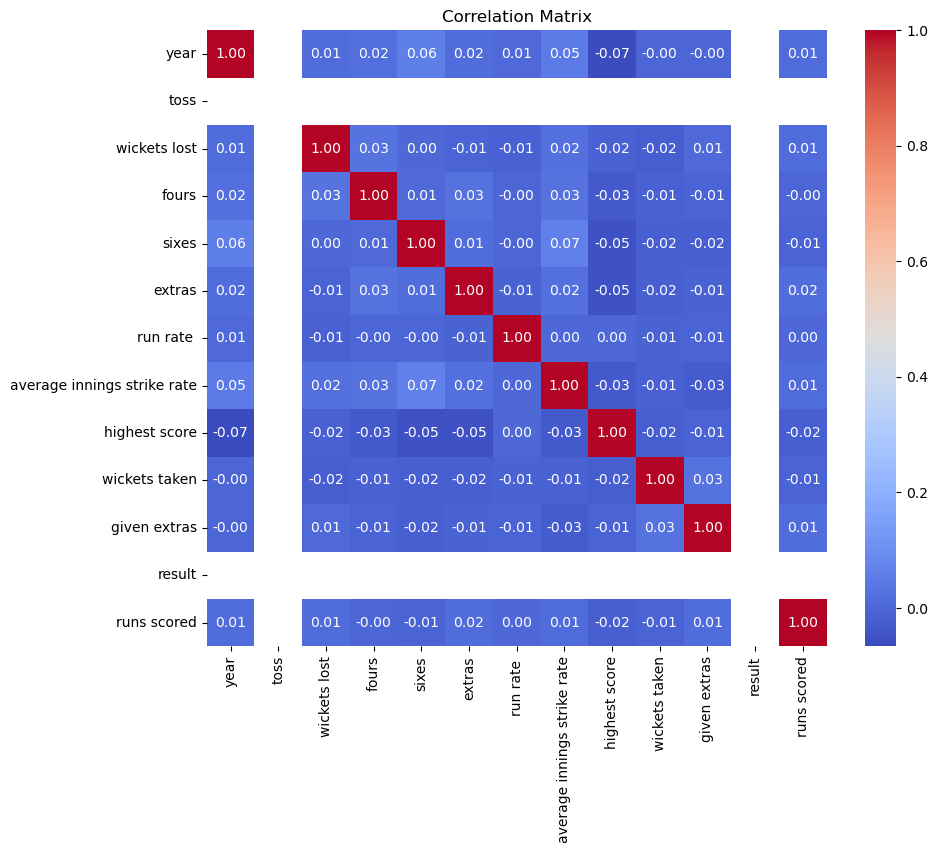

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

non_num = ['team name', 'opponent', 'host']
df2=df.copy();
for col in non_num:
    df2.drop(col,axis=1,inplace=True)
correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Data obviously isnt very correlated, so wont use it here

# LASSO REGRESSION
There are not that many features also here, so lasso regression meh

# ELASTIC NET REGRESSION
This is a combination of both Ridge and Lasso which are both useless here, so no need

# DECISION TREE REGRESSOR
Might work here, and looks lik data needs some overfitting too

In [115]:
from sklearn.tree import DecisionTreeRegressor
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", DecisionTreeRegressor())
])
model4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim', DecisionTreeRegressor())])

In [116]:
y_train_pred = model4.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model4.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  0.0
RMSE:  201.30624214117157


Very bad, so much overfitting

In [145]:
from sklearn.tree import DecisionTreeRegressor
model5 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", DecisionTreeRegressor(max_depth=5, min_samples_leaf=10))
])
#10 sample leaves bcos 10 unique values for first 3 columns
model5.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=10))])

In [127]:
y_train_pred = model5.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model5.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  139.55039614216489
RMSE:  144.08038823638736


Much Much better now, ovverfitting reduced drastically

Nice but SVR better ig

# RANDOM FOREST GENERATOR
bcos it builds multiple decision trees and takes average, it reduces overfitting

In [132]:
from sklearn.ensemble import RandomForestRegressor
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", RandomForestRegressor())
])
model6.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim', RandomForestRegressor())])

In [133]:
y_train_pred = model6.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model6.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  53.54257298914084
RMSE:  144.66782404946974


Still lot of overfitting, time to set the parameters

In [136]:
help(RandomForestRegressor())

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sphx_glr_auto_exam

In [137]:
from sklearn.ensemble import RandomForestRegressor
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", RandomForestRegressor(max_depth=5,min_samples_leaf=10))
])
model6.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim',
                 RandomForestRegressor(max_depth=5, min_samples_leaf=10))])

In [138]:
y_train_pred = model6.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model6.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  137.58745699740177
RMSE:  142.54583288747924


Wowww, much better

# GRADIENT BOOSTING REGRESSION
I'm using this bcos ChatGPT told:
Use Case: Often results in high performance and is used in many winning Kaggle solutions.

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", GradientBoostingRegressor(max_depth=5,min_samples_leaf=10))
])
#Using same parameters as before cos this is also a tree model and i cehcked already, overfitting was happening
model7.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim',
                 GradientBoostingRegressor(max_depth=5, min_samples_leaf=10))])

In [144]:
y_train_pred = model7.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model7.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  115.02324416924328
RMSE:  145.31355188749663


Let us try tuning the parameters a bit more

In [146]:
help(GradientBoostingRegressor())

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  This estimator builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage a regression tree is fit on the negative gradient of the given
 |  loss function.
 |  
 |  :class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
 |  variant of this algorith

<Axes: xlabel='team name'>

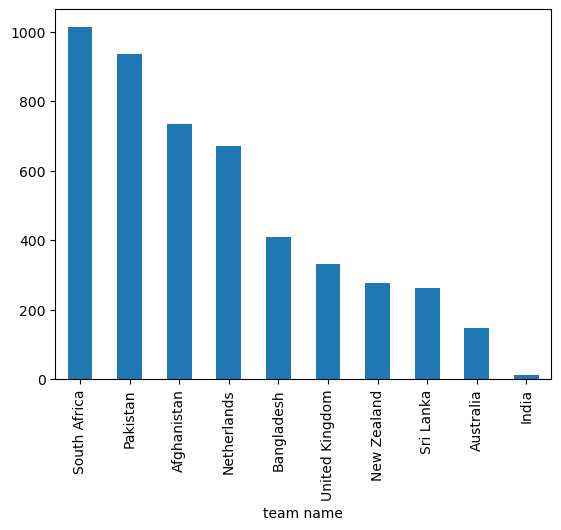

In [196]:
import matplotlib.pyplot as plt
pd.value_counts(df['team name']).plot(kind='bar')

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", GradientBoostingRegressor(learning_rate=0.3,n_estimators=1,max_depth=1,min_samples_leaf=10,min_samples_split=10))
])
#Using same parameters as before cos this is also a tree model and i cehcked already, overfitting was happening
model7.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['team name', 'opponent',
                                                   'host'])])),
                ('prim',
                 GradientBoostingRegressor(learning_rate=0.3, max_depth=1,
                                           min_samples_leaf=10,
                                           min_samples_split=10,
                                           n_estimators=1))])

In [204]:
y_train_pred = model7.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model7.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  141.24847442295325
RMSE:  142.4488385439805


# Using XGBoost to Imporvise

In [208]:
import xgboost as xg

In [244]:

model9 = Pipeline([
    ('preprocessor', preprocessor),
    ("prim", xg.XGBRegressor(objective ='reg:linear',learning_rate=0.01,n_estimators=1,max_depth=1))
])
model9.fit(X_train, y_train)


C:\Users\durga\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:52:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'toss',
                                                   'wickets taken', 'fours',
                                                   'sixes', 'extras',
                                                   'run rate ',
                                                   'average innings strike '
                                                   'rate',
                                                   'highest score',
                                                   'wickets taken',
                                                   'given extras', 'result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncod...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=1, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1, n_jobs=None,
                              num_parallel_tree=None, objective='reg:linear', ...))])

In [245]:
y_train_pred = model9.predict(X_train)
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
y_test_pred = model9.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE:  141.35931021736334
RMSE:  142.5561424460149


In [246]:
help(xg.XGBRegressor())

Help on XGBRegressor in module xgboost.sklearn object:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          